In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from time import time

In [2]:
df = pd.read_csv('fifa19.csv', encoding='utf-8')
df.sample(3)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
14044,14044,239393,D. Frieser,24,https://cdn.sofifa.org/players/4/19/239393.png,Austria,https://cdn.sofifa.org/flags/4.png,61,64,LASK Linz,...,55.0,45.0,47.0,53.0,11.0,12.0,7.0,6.0,7.0,€496K
3808,3808,212680,J. Jones,23,https://cdn.sofifa.org/players/4/19/212680.png,Northern Ireland,https://cdn.sofifa.org/flags/35.png,72,77,Kilmarnock,...,67.0,40.0,42.0,45.0,13.0,12.0,7.0,11.0,8.0,€7.6M
6244,6244,135587,N. Mäenpää,33,https://cdn.sofifa.org/players/4/19/135587.png,Finland,https://cdn.sofifa.org/flags/17.png,69,69,Bristol City,...,41.0,13.0,9.0,12.0,70.0,69.0,65.0,66.0,66.0,€998K


In [3]:
df.shape

(18207, 89)

In [4]:
def more_than(column=["Overall", "Potential"], 
                        x=(0,100,1)):
    return df.loc[df[column] > x]

In [5]:
df.keys()

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [6]:
df.SprintSpeed.head()

0    86.0
1    91.0
2    90.0
3    58.0
4    76.0
Name: SprintSpeed, dtype: float64

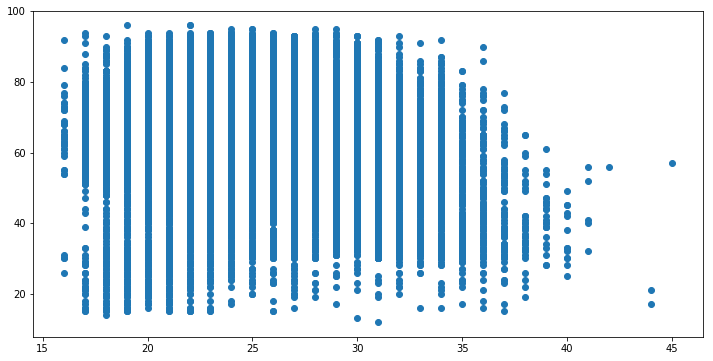

In [7]:
plt.figure(figsize=(12,6))
plt.scatter(df['Age'], df['SprintSpeed'])

In [8]:
age_freq = df.groupby('Age')['Age'].count()
age_freq[:5]

Age
16      42
17     289
18     732
19    1024
20    1240
Name: Age, dtype: int64

<BarContainer object of 29 artists>

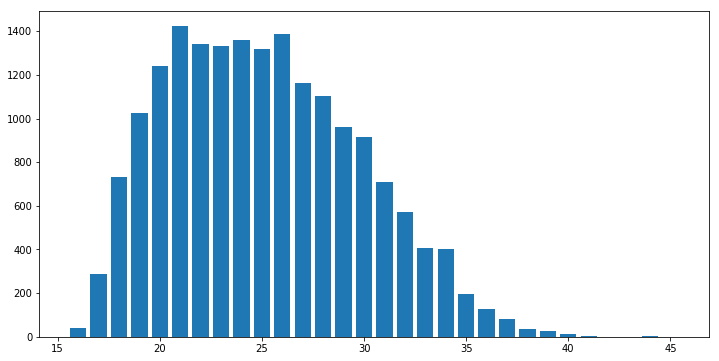

In [9]:
age_index = age_freq.index
plt.figure(figsize=(12,6))
plt.bar(age_index, age_freq)

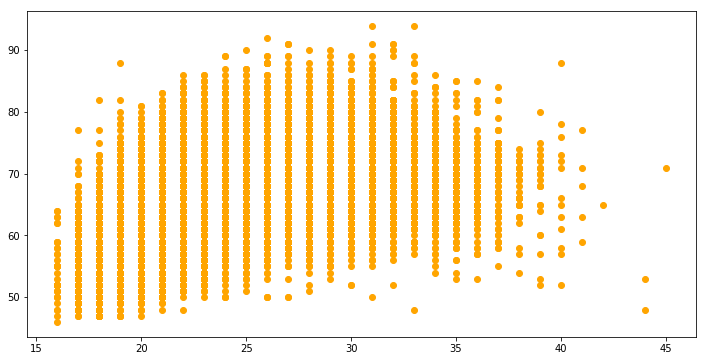

In [10]:
age = df['Age']
overall = df['Overall']
plt.figure(figsize=(12,6))
plt.scatter(age, overall, color='orange')
plt.show()

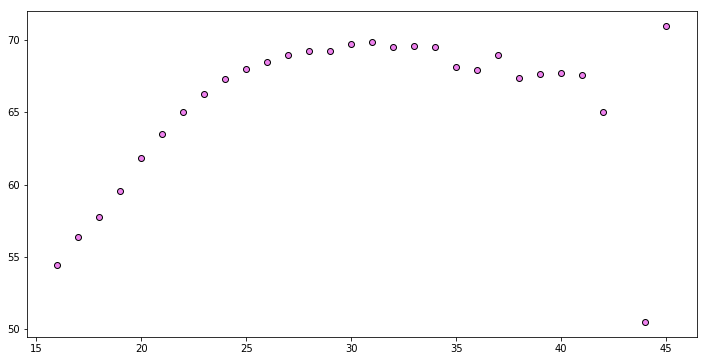

In [11]:
overall_by_age = df.groupby('Age')['Overall'].mean()
overall_index = overall_by_age.index
plt.figure(figsize=(12,6))
plt.scatter(overall_index, overall_by_age, color='violet', edgecolor='k')

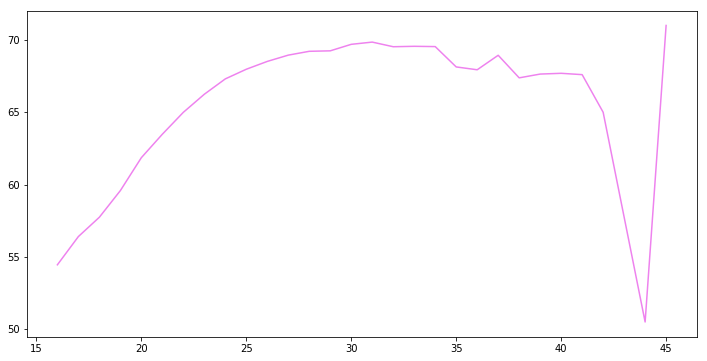

In [12]:
plt.figure(figsize=(12,6))
plt.plot(overall_by_age, color='violet')

In [13]:
df[df['Age']>=45]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
4741,4741,140029,O. Pérez,45,https://cdn.sofifa.org/players/4/19/140029.png,Mexico,https://cdn.sofifa.org/flags/83.png,71,71,Pachuca,...,62.0,23.0,12.0,11.0,70.0,64.0,65.0,73.0,74.0,€272K


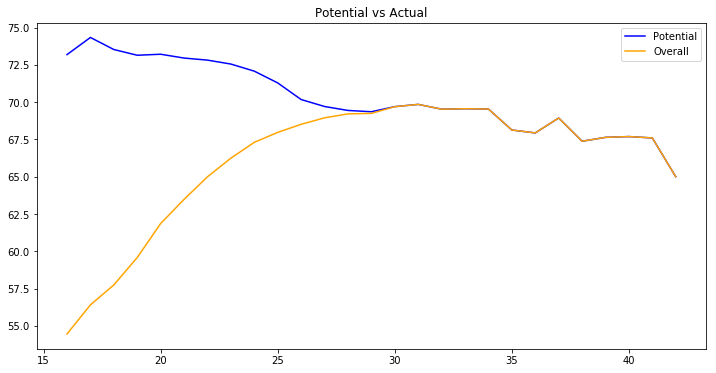

In [14]:
rob_df = df[df['Age']<43]

potential = rob_df.groupby('Age').Potential.mean()
overall = rob_df.groupby('Age').Overall.mean()

plt.figure(figsize=(12,6))
plt.plot(potential, color='blue')
plt.plot(overall, color='orange')
plt.title("Potential vs Actual")
plt.legend()

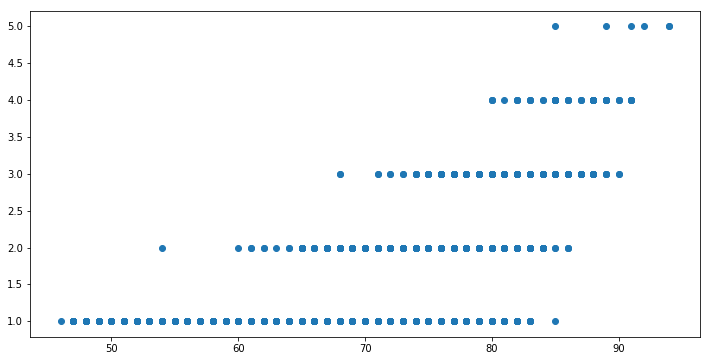

In [15]:
overall = rob_df['Overall']
rep = rob_df['International Reputation']

plt.figure(figsize=(12,6))
plt.scatter(overall, rep)

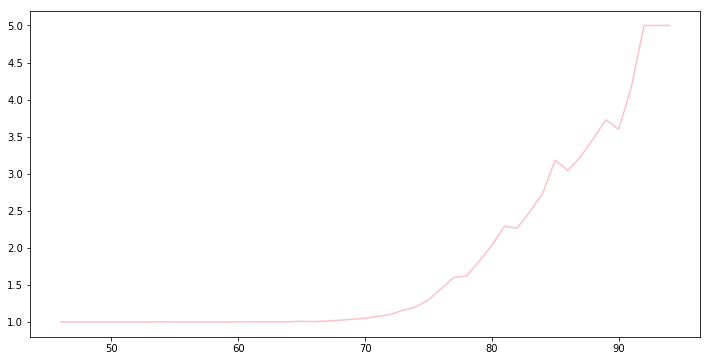

In [16]:
overall = rob_df.groupby('Overall')['International Reputation'].mean()

plt.figure(figsize=(12,6))
plt.plot(overall, color='pink')

## Take 2

In [20]:
rob_df.keys()

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

Text(0.5, 1.0, 'Age-Agility')

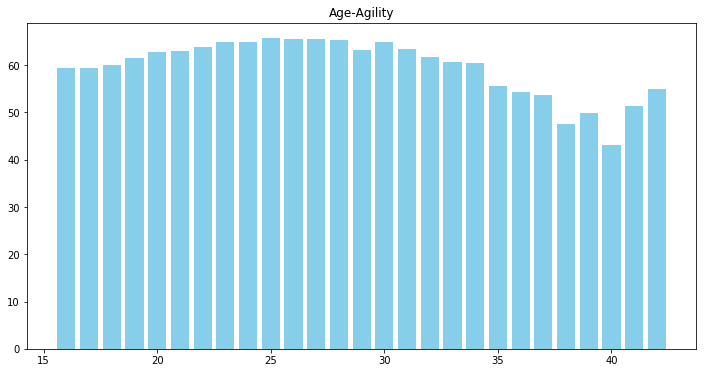

In [21]:
agi = rob_df.groupby('Age')['Agility'].mean()

plt.figure(figsize=(12,6))
plt.bar(agi.index, agi, color='skyblue')
plt.title('Age-Agility')

Text(0.5, 1.0, 'Age-Speed')

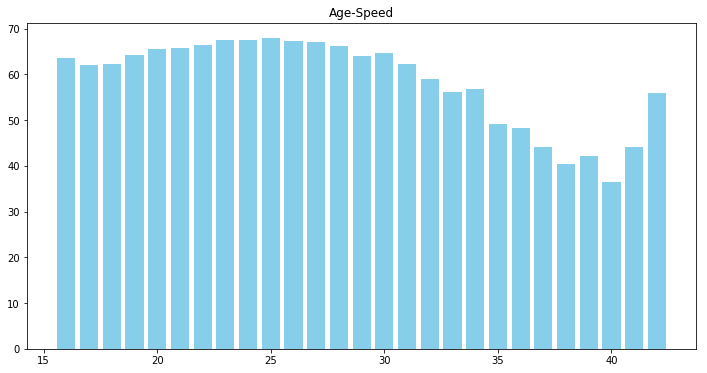

In [22]:
agi = rob_df.groupby('Age')['SprintSpeed'].mean()

plt.figure(figsize=(12,6))
plt.bar(agi.index, agi, color='skyblue')
plt.title('Age-Speed')

Text(0.5, 1.0, 'Age and SprintSpeed')

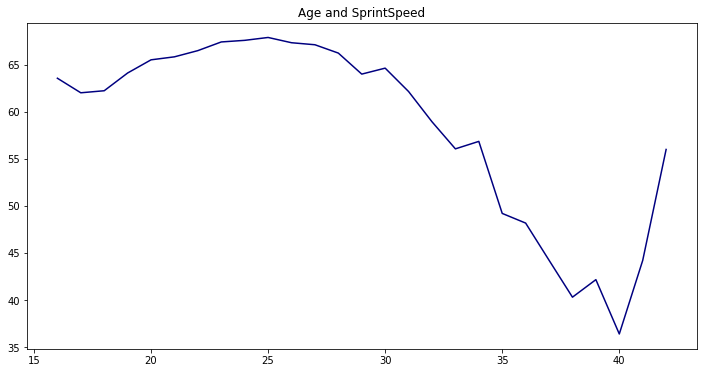

In [23]:
plt.figure(figsize=(12,6))
plt.plot(agi, color='navy')
plt.title('Age and SprintSpeed')

In [24]:
rob_df.keys()

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

Text(0.5, 1.0, 'Ball Control Over Age Groups')

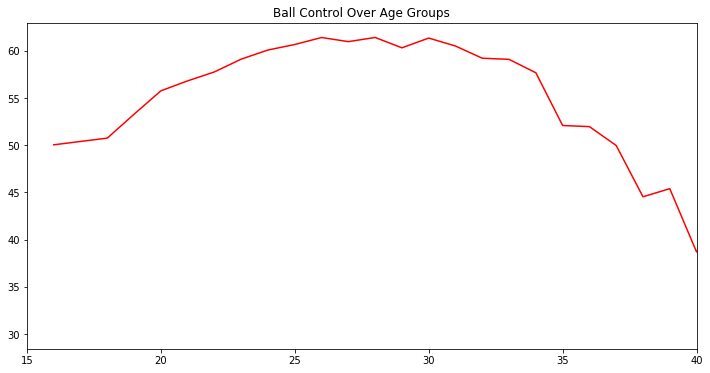

In [25]:
mean_ball = rob_df.groupby("Age")['BallControl'].mean()

plt.figure(figsize=(12,6))
plt.plot(mean_ball, color='red')
plt.xlim(15, 40)
plt.title("Ball Control Over Age Groups")

Text(0.5, 1.0, 'Shot Power Over Age Groups')

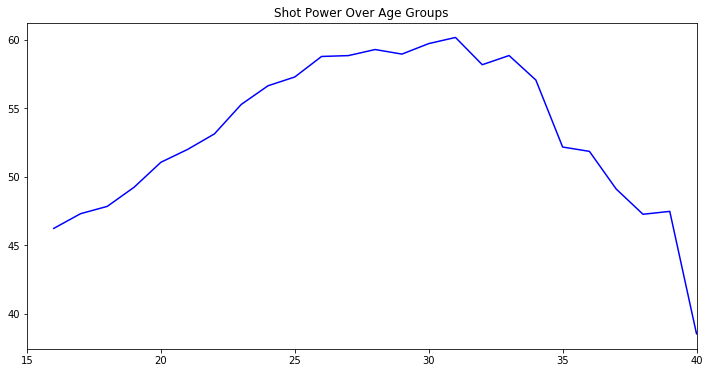

In [26]:
mean_shotpower = rob_df.groupby("Age")['ShotPower'].mean()

plt.figure(figsize=(12,6))
plt.plot(mean_shotpower, color='blue')
plt.xlim(15, 40)
plt.title("Shot Power Over Age Groups")

In [27]:
def over_age(df, column):
    means = df.groupby("Age")[column].mean()
    
    plt.figure(figsize=(12,6))
    plt.plot(means, color='blue')
    plt.xlim(15, 40)
    plt.title("{0} Over Age Groups".format(column))

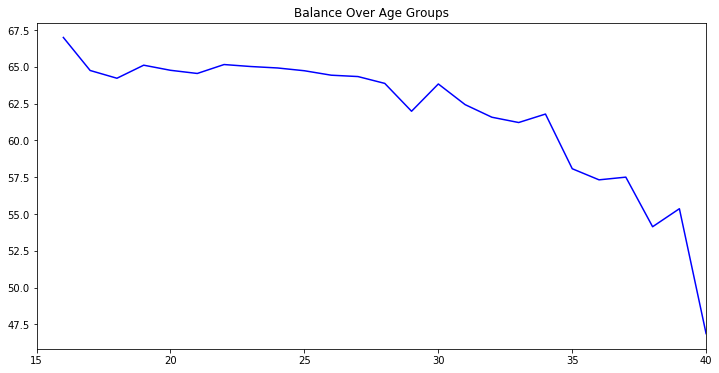

In [28]:
over_age(rob_df, "Balance")

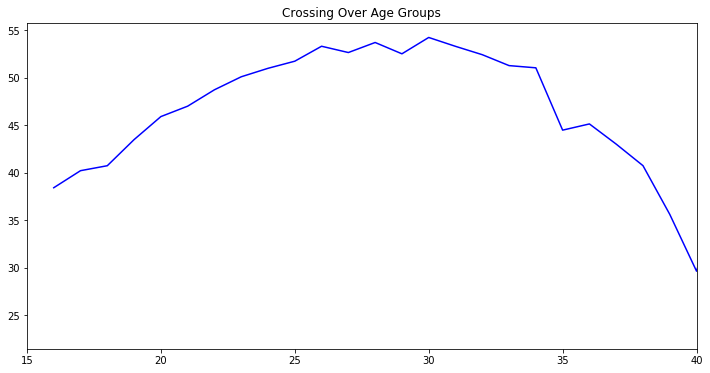

In [29]:
over_age(rob_df, "Crossing")

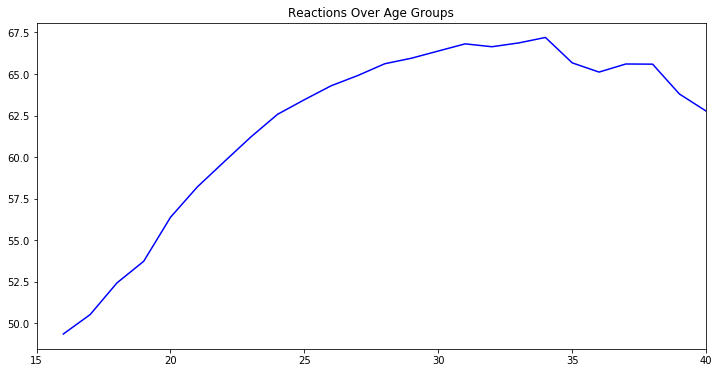

In [30]:
over_age(rob_df, 'Reactions')

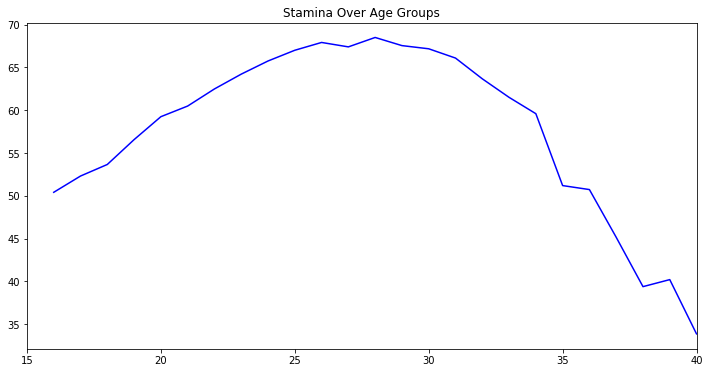

In [31]:
over_age(rob_df, "Stamina")

In [32]:
rob_df.head(3)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


In [33]:
df = rob_df.drop(columns=["Unnamed: 0"])
df[df['Name']=="Cristiano Ronaldo"]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


In [34]:
rob_df[rob_df['Name']=='Cristiano Ronaldo']['Age'].values[0]

33

In [35]:
rob_df[['Name','Finishing', 'Dribbling', 'BallControl', 'SprintSpeed', 'ShortPassing', 'Reactions', 'Balance', 'Stamina', 'Vision']]

,Name,Finishing,Dribbling,BallControl,SprintSpeed,ShortPassing,Reactions,Balance,Stamina,Vision
0,L. Messi,95.0,97.0,96.0,86.0,90.0,95.0,95.0,72.0,94.0
1,Cristiano Ronaldo,94.0,88.0,94.0,91.0,81.0,96.0,70.0,88.0,82.0
2,Neymar Jr,87.0,96.0,95.0,90.0,84.0,94.0,84.0,81.0,87.0
3,De Gea,13.0,18.0,42.0,58.0,50.0,90.0,43.0,43.0,68.0
4,K. De Bruyne,82.0,86.0,91.0,76.0,92.0,91.0,77.0,90.0,94.0
5,E. Hazard,84.0,95.0,94.0,88.0,89.0,90.0,94.0,83.0,89.0
6,L. Modrić,72.0,90.0,93.0,72.0,93.0,90.0,94.0,89.0,92.0
7,L. Suárez,93.0,87.0,90.0,75.0,82.0,92.0,83.0,90.0,84.0
8,Sergio Ramos,60.0,63.0,84.0,75.0,78.0,85.0,66.0,84.0,63.0
9,J. Oblak,11.0,12.0,16.0,60.0,29.0,86.0,49.0,41.0,70.0


In [36]:
def bar_stats(df, player):
    peer = df[df['Name']==player]['Age'].values[0]
    playerdf = df[df['Name']==player]
    peerdf = df[df['Age']==peer]
      
    N = 9
    one = playerdf[['Finishing', 'Dribbling', 'BallControl', 'SprintSpeed', 'ShortPassing', 'Reactions', 'Balance', 'Stamina', 'Vision']]

    fig, ax = plt.subplots()

    ind = np.arange(N)    # the x locations for the groups
    width = 0.35         # the width of the bars
    p1 = ax.bar(ind, one, width)


    two = peerdf[['Finishing', 'Dribbling', 'BallControl', 'SprintSpeed', 'ShortPassing', 'Reactions', 'Balance', 'Stamina', 'Vision']].mean()
    p2 = ax.bar(ind + width, two, width)

    ax.set_title('{0} vs Peers'.format(player))
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(['Finishing', 'Dribbling', 'BallControl', 'SprintSpeed', 'ShortPassing', 'Reactions', 'Balance', 'Stamina', 'Vision'])

    ax.legend((p1[0], p2[0]), (player, 'Peer'))
    ax.yaxis.set_units(inch)
    ax.autoscale_view()


### Relation Between A and B

In [37]:
def scatter_rel(df=rob_df, feature_one='SprintSpeed', feature_two='Dribbling', top_n=500, color='dodgerblue'):
    plt.figure(figsize=(12,6))
    plt.scatter(df[feature_one][:top_n], df[feature_two][:top_n], c=color, s=7)
    plt.title("{0}-{1}".format(feature_one, feature_two))
    plt.xlabel("{}".format(feature_one))
    plt.ylabel("{}".format(feature_two))

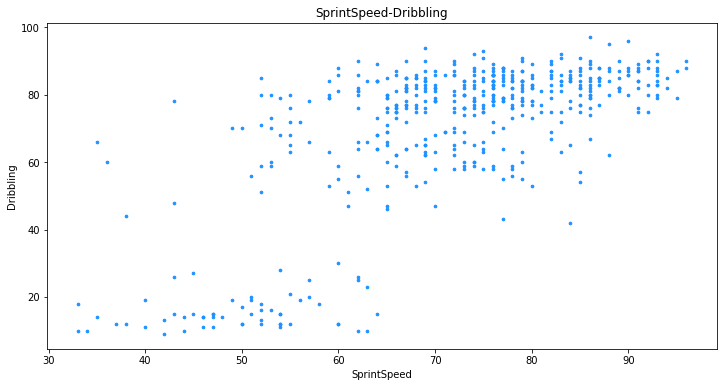

In [38]:
scatter_rel()

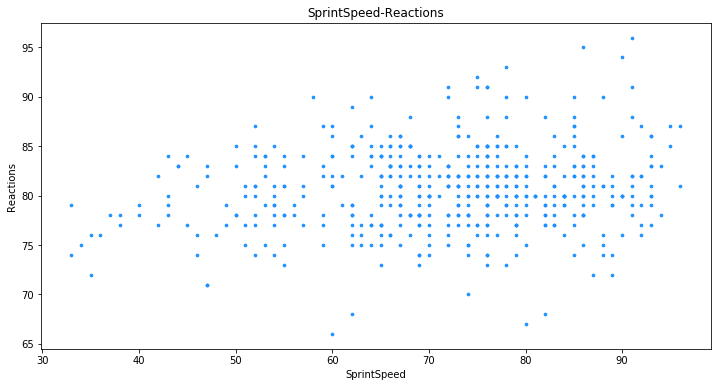

In [39]:
scatter_rel(feature_two='Reactions')

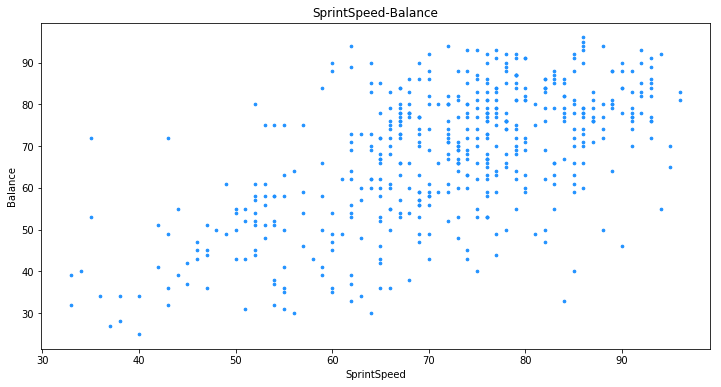

In [40]:
scatter_rel(feature_two='Balance')

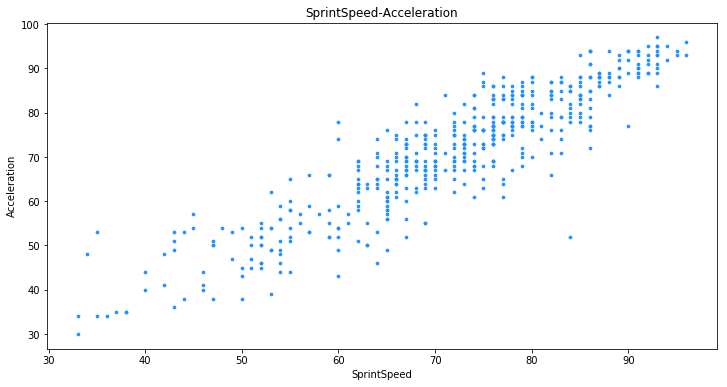

In [41]:
scatter_rel(feature_two='Acceleration')

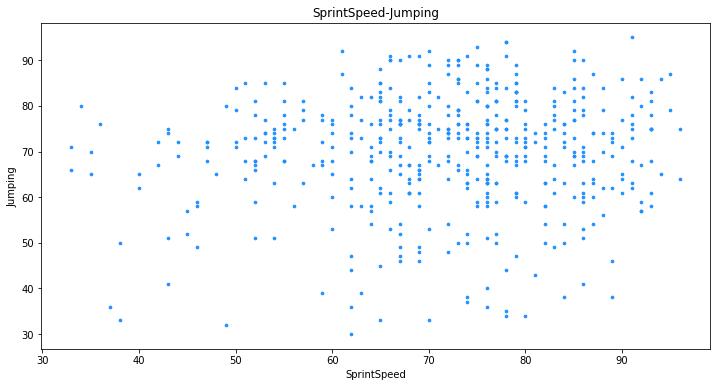

In [42]:
scatter_rel(feature_two='Jumping')

In [43]:
df.keys()

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

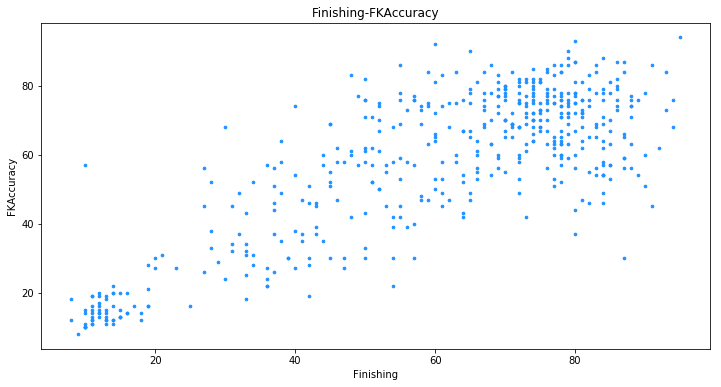

In [44]:
scatter_rel(feature_one='Finishing', feature_two='FKAccuracy')

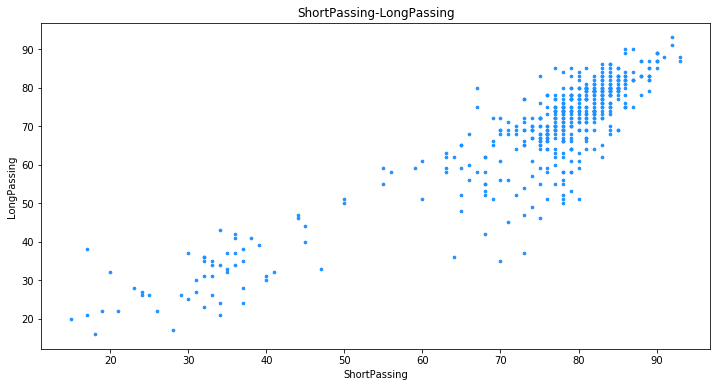

In [45]:
scatter_rel(feature_one='ShortPassing', feature_two='LongPassing')

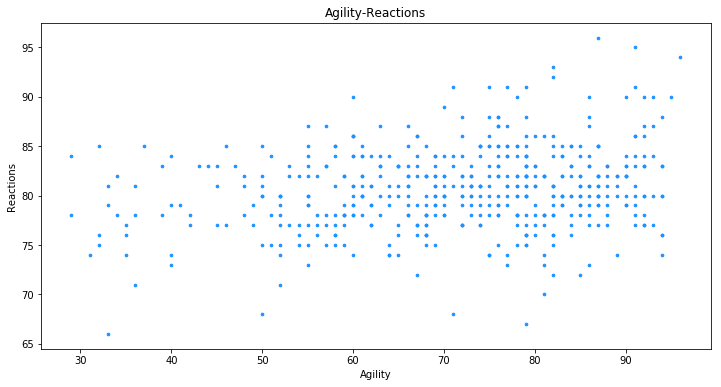

In [46]:
scatter_rel(feature_one='Agility', feature_two='Reactions')

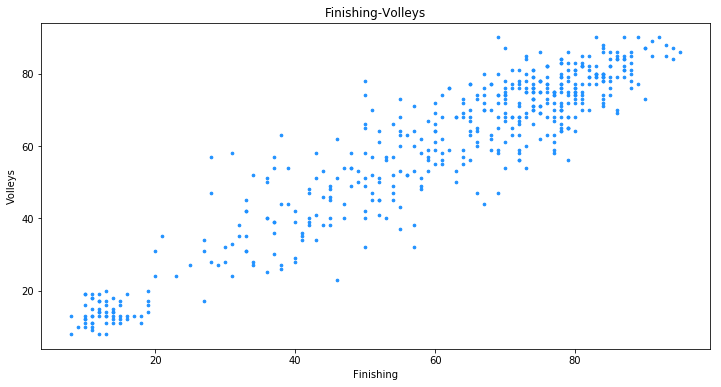

In [47]:
scatter_rel(feature_one='Finishing', feature_two='Volleys')

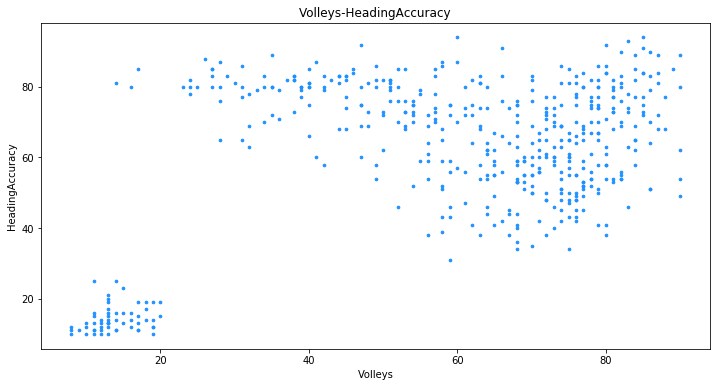

In [48]:
scatter_rel(feature_one='Volleys', feature_two='HeadingAccuracy')

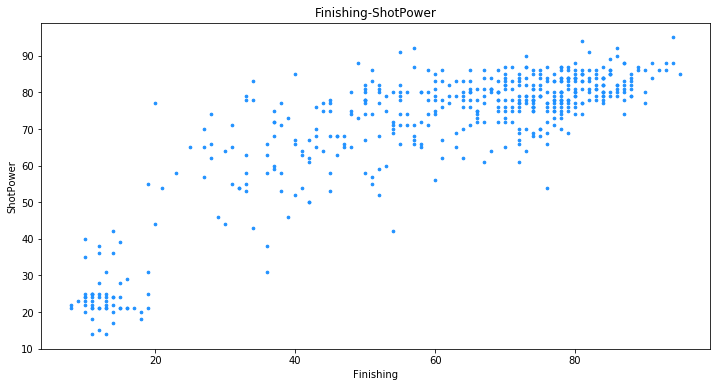

In [49]:
scatter_rel(feature_one='Finishing', feature_two='ShotPower')

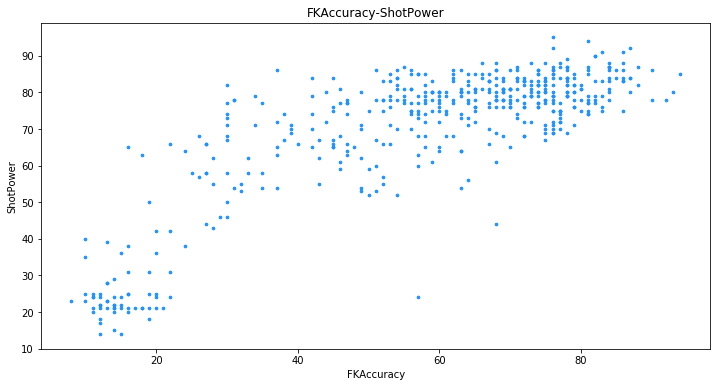

In [50]:
scatter_rel(feature_one='FKAccuracy', feature_two='ShotPower')

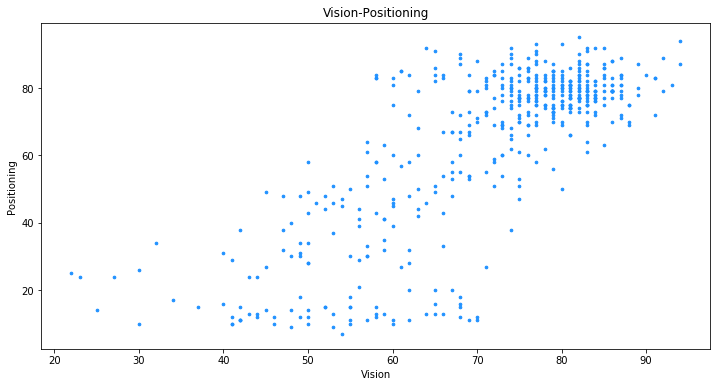

In [51]:
scatter_rel(feature_one='Vision', feature_two='Positioning')

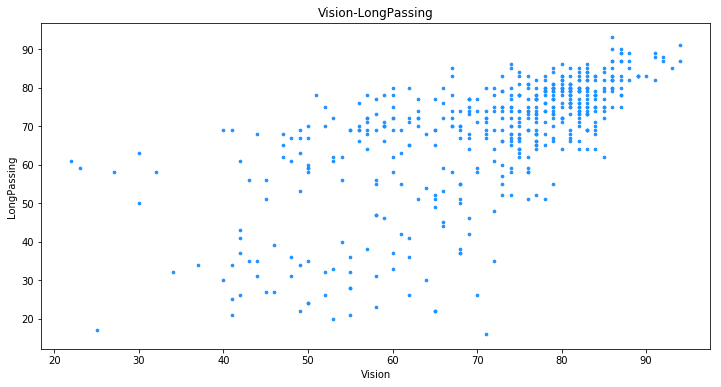

In [52]:
scatter_rel(feature_one='Vision', feature_two='LongPassing')

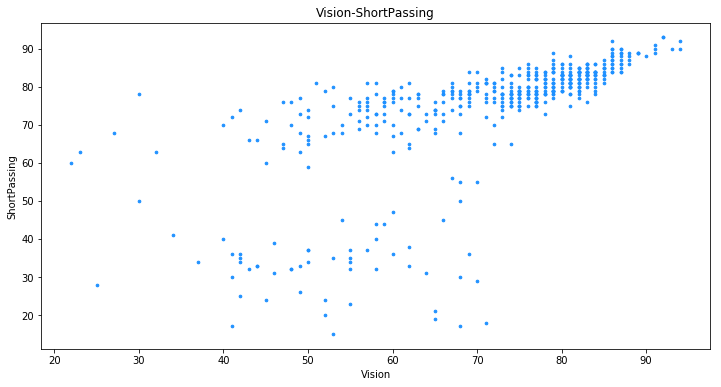

In [53]:
scatter_rel(feature_one='Vision', feature_two='ShortPassing')

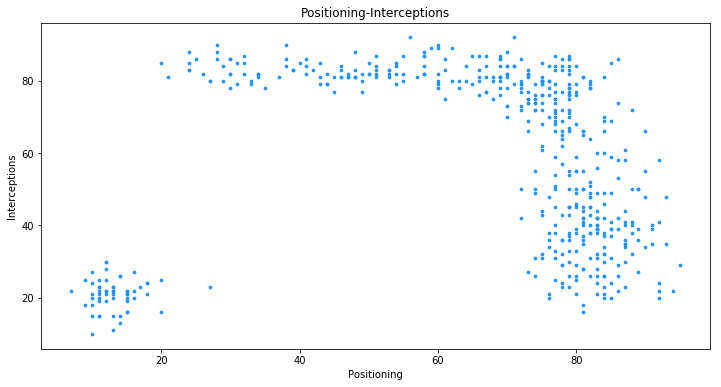

In [54]:
scatter_rel(feature_one='Positioning', feature_two='Interceptions')

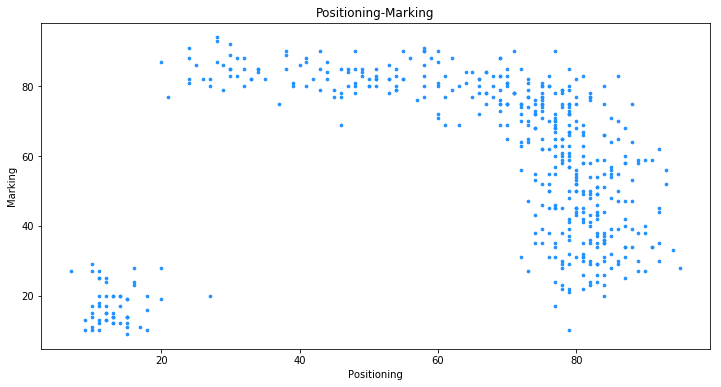

In [55]:
scatter_rel(feature_one='Positioning', feature_two='Marking')

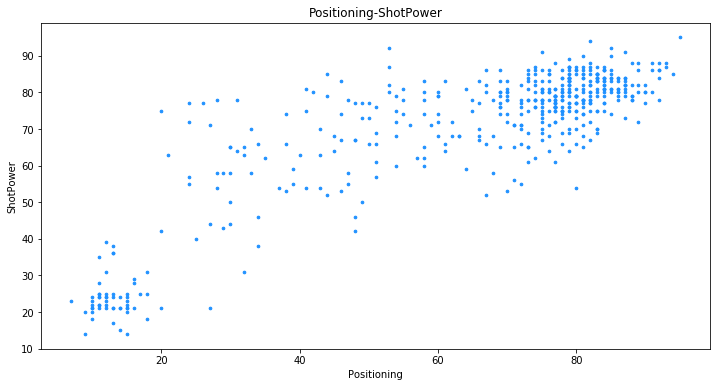

In [56]:
scatter_rel(feature_one='Positioning', feature_two='ShotPower')

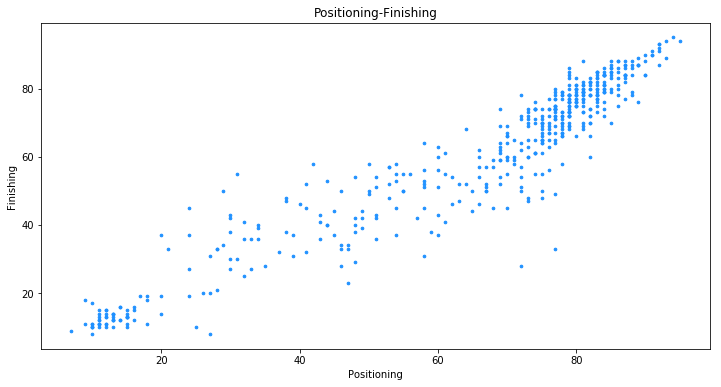

In [103]:
scatter_rel(feature_one='Positioning', feature_two='Finishing')

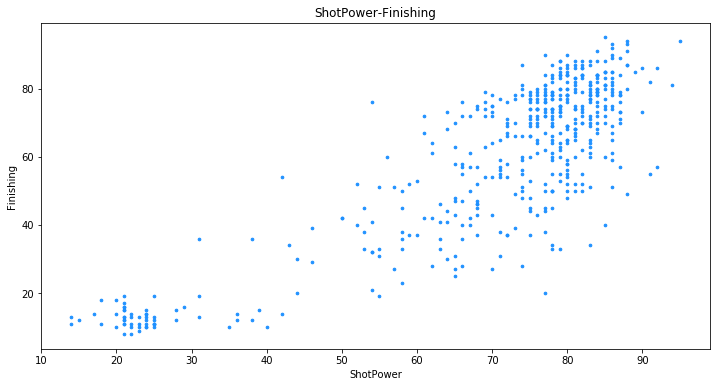

In [105]:
scatter_rel(feature_one='ShotPower', feature_two='Finishing')

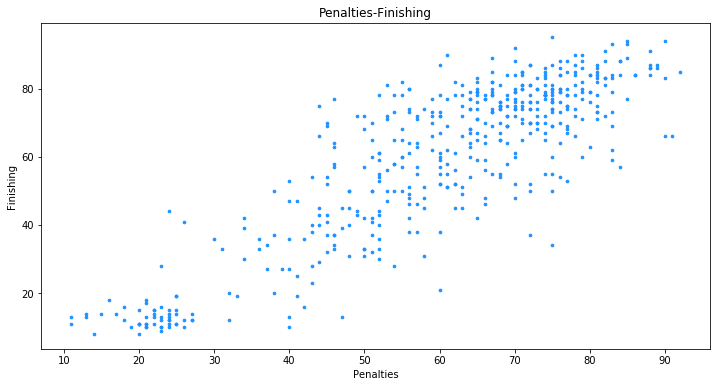

In [106]:
scatter_rel(feature_one='Penalties', feature_two='Finishing')

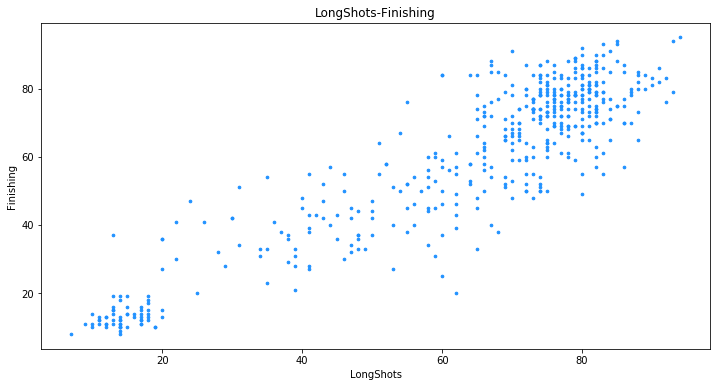

In [108]:
scatter_rel(feature_one='LongShots', feature_two='Finishing')

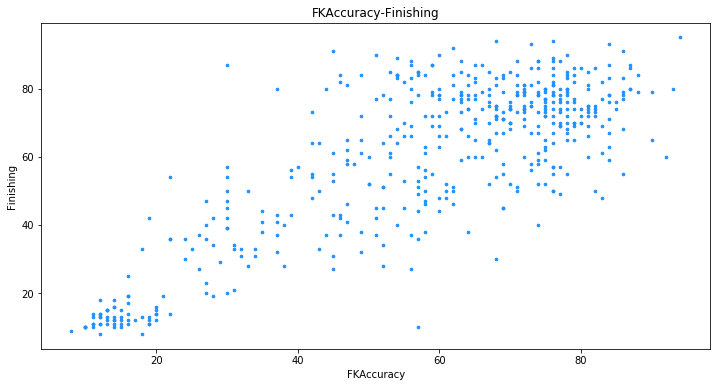

In [109]:
scatter_rel(feature_one='FKAccuracy', feature_two='Finishing')

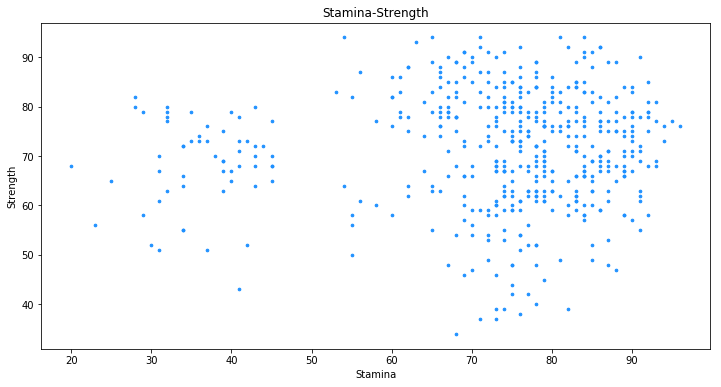

In [99]:
scatter_rel(feature_one='Stamina', feature_two='Strength')

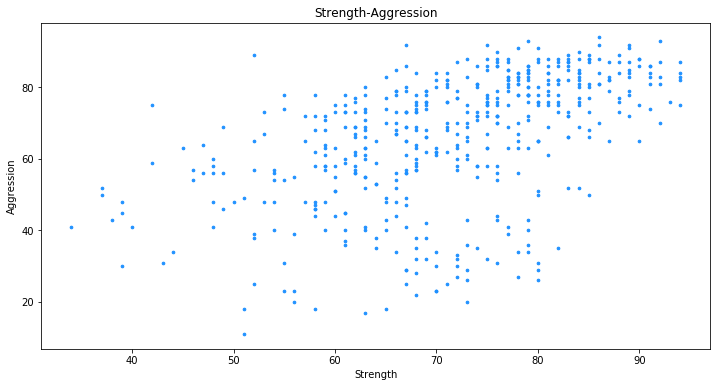

In [101]:
scatter_rel(feature_one='Strength', feature_two='Aggression')

## BY CLUB

In [58]:
df.head(3)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


In [60]:
df.groupby('Club')['Overall'].mean().sort_values(ascending=False)[:10]

Club
Juventus               82.280000
Napoli                 80.000000
Inter                  79.750000
Real Madrid            78.242424
Milan                  78.074074
FC Barcelona           78.030303
Paris Saint-Germain    77.433333
Roma                   77.423077
Manchester United      77.242424
SL Benfica             77.000000
Name: Overall, dtype: float64

In [85]:
df.groupby('Club')['ShortPassing'].mean().sort_values(ascending=False)[:10]

Club
FC Barcelona           72.363636
Paris Saint-Germain    71.766667
Manchester United      71.484848
Manchester City        71.060606
Chelsea                70.969697
Liverpool              70.727273
Napoli                 70.680000
Borussia Dortmund      70.393939
Juventus               70.160000
Tottenham Hotspur      70.121212
Name: ShortPassing, dtype: float64

In [86]:
df.groupby('Club')['Stamina'].mean().sort_values(ascending=False)[:10]

Club
Wycombe Wanderers                73.840000
Walsall                          73.037037
Juventus                         72.760000
SL Benfica                       71.714286
Shanghai Greenland Shenhua FC    71.259259
Boca Juniors                     71.148148
Santos Laguna                    71.076923
Napoli                           70.760000
US Salernitana 1919              70.750000
Inter                            70.500000
Name: Stamina, dtype: float64

In [96]:
df.groupby('Club')['Aggression'].mean().sort_values(ascending=False)[:10]

Club
Manchester United    69.939394
West Ham United      68.218750
SL Benfica           67.464286
Leicester City       66.750000
Juventus             66.680000
Colorado Rapids      66.652174
Fenerbahçe SK        65.766667
FC Porto             65.321429
Tottenham Hotspur    65.212121
Everton              64.906250
Name: Aggression, dtype: float64

In [97]:
df.groupby('Club')['Strength'].mean().sort_values(ascending=False)[:10]

Club
Juventus              72.920000
Boca Juniors          72.518519
SV Sandhausen         71.758621
Olympique Lyonnais    71.137931
Udinese               70.933333
Manchester United     70.909091
Rangers FC            70.785714
Newcastle Jets        70.750000
Royal Antwerp FC      70.720000
Sporting CP           70.700000
Name: Strength, dtype: float64

In [95]:
df.groupby('Club')['Age'].mean().sort_values(ascending=False)[:10]

Club
Paraná                  31.6
Cruzeiro                30.6
Atlético Paranaense     30.4
Chapecoense             30.4
Botafogo                30.4
Fluminense              30.2
Ceará Sporting Club     30.2
Sport Club do Recife    30.2
Bahia                   30.0
Grêmio                  30.0
Name: Age, dtype: float64

In [110]:
df.groupby('Club')[['Age', 'Overall', 'ShortPassing', 'Stamina']].mean().sort_values(by='Overall', ascending=False)[:10]

,Age,Overall,ShortPassing,Stamina
Club,,,,
Juventus,27.160000,82.280000,70.160000,72.760000
Napoli,25.920000,80.000000,70.680000,70.760000
Inter,27.458333,79.750000,68.375000,70.500000
Real Madrid,24.030303,78.242424,69.606061,69.757576
Milan,25.000000,78.074074,68.444444,68.592593
FC Barcelona,23.848485,78.030303,72.363636,68.393939
Paris Saint-Germain,24.566667,77.433333,71.766667,67.500000
Roma,25.653846,77.423077,67.769231,67.153846
Manchester United,24.757576,77.242424,71.484848,70.393939


In [117]:
df[df['Club'].isin(df.groupby('Club')['Overall'].mean().sort_values(ascending=False)[:10].index)].groupby('Club')['ID'].count()

Club
FC Barcelona           33
Inter                  24
Juventus               25
Manchester United      33
Milan                  27
Napoli                 25
Paris Saint-Germain    30
Real Madrid            33
Roma                   26
SL Benfica             28
Name: ID, dtype: int64

## BY NATIONALITY

In [90]:
X = df.groupby("Nationality")['Overall'].count()>20
X[:15]

Nationality
Afghanistan          False
Albania               True
Algeria               True
Andorra              False
Angola               False
Antigua & Barbuda    False
Argentina             True
Armenia              False
Australia             True
Austria               True
Azerbaijan           False
Barbados             False
Belarus              False
Belgium               True
Belize               False
Name: Overall, dtype: bool

In [79]:
gato = [i for i, x in enumerate(X) if x]
len(gato)

73

In [81]:
strong = X[gato].index

In [83]:
df[df['Nationality'].isin(strong)].groupby('Nationality')['Overall'].mean().sort_values(ascending=False)[:10]

Nationality
Portugal    71.344720
Brazil      71.251511
Algeria     70.633333
Uruguay     70.429530
Ukraine     70.424658
Egypt       70.225806
Peru        70.216216
Russia      70.063291
Morocco     69.941176
Serbia      69.928571
Name: Overall, dtype: float64

### TOP GUNS

In [122]:
df.sort_values(by='Overall', ascending=False).drop_duplicates(subset=['Nationality'], keep='first')[:15]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M
11,182521,T. Kroos,28,https://cdn.sofifa.org/players/4/19/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,€156.8M
10,188545,R. Lewandowski,29,https://cdn.sofifa.org/players/4/19/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,90,90,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,...,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,€127.1M


In [123]:
df.sort_values(by='Overall', ascending=False).drop_duplicates(subset=['Club'], keep='first')[:15]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
12,182493,D. Godín,32,https://cdn.sofifa.org/players/4/19/182493.png,Uruguay,https://cdn.sofifa.org/flags/60.png,90,90,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,€90.2M
10,188545,R. Lewandowski,29,https://cdn.sofifa.org/players/4/19/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,90,90,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,...,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,€127.1M
16,202126,H. Kane,24,https://cdn.sofifa.org/players/4/19/202126.png,England,https://cdn.sofifa.org/flags/14.png,89,91,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,...,89.0,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,€160.7M


In [126]:
df.sort_values(by='Overall', ascending=False).drop_duplicates(subset=['Club'], keep='first').groupby("Nationality")['ID'].count().sort_values(ascending=False)[:15]

Nationality
Argentina              56
Brazil                 48
Spain                  47
England                43
Germany                42
France                 38
Italy                  25
Colombia               24
Belgium                17
Portugal               17
Denmark                15
Sweden                 15
Norway                 14
Republic of Ireland    14
Netherlands            13
Name: ID, dtype: int64

## POSITIONS

In [127]:
df.keys()

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [134]:
forwards = ['ST', 'RS', 'LS', 'CF', 'RF', 'LF']
mfs = ['CAM', 'CDM', 'CM', 'LAM', 'RAM','RCM', 'RDM', 'RM', 'RW', 'LCM', 'LDM', 'LM' ]
dfs = ['CB', 'LB', 'RB', 'LCB', 'RCB', 'LWB', 'RWB']
gk = ['GK']

In [137]:
fwdf = df[df['Position'].isin(forwards)]
mfdf = df[df['Position'].isin(mfs)]
dfdf = df[df['Position'].isin(dfs)]
gkdf = df[df['Position'].isin(gk)]

fwdf.shape, mfdf.shape, dfdf.shape, gkdf.shape

((2667, 88), (7208, 88), (5866, 88), (2022, 88))

In [139]:
print("전체 선수 중 공격수는 {0}명({1:.02f}%), 미드필더는 {2}명({3:.02f}%), 수비수는 {4}명({5:.02f}%), 골키퍼는 {6}명({7:.02f}%)입니다.".format(len(fwdf), len(fwdf)*100/len(df), len(mfdf), len(mfdf)*100/len(df), len(dfdf), len(dfdf)*100/len(df), len(gkdf), len(gkdf)*100/len(df)))

전체 선수 중 공격수는 2667명(14.65%), 미드필더는 7208명(39.60%), 수비수는 5866명(32.22%), 골키퍼는 2022명(11.11%)입니다.


In [140]:
fwdf.Finishing.mean(), mfdf.Finishing.mean(), dfdf.Finishing.mean(), gkdf.Finishing.mean()

(66.92688413948257, 54.728357380688124, 35.07245141493352, 12.014836795252226)

In [208]:
fwdf.Positioning.mean(), dfdf.Positioning.mean(), dfdf.Positioning.mean(), gkdf.Positioning.mean()

(65.78777652793401, 43.87947494033413, 43.87947494033413, 11.257171117705242)

In [211]:
fwdf.sort_values(by='Overall', ascending=False)[:100].groupby('Nationality')['ID'].count().sort_values(ascending=False)[:10]

Nationality
Spain          19
Brazil         10
Argentina       8
France          8
Germany         7
Italy           7
England         5
Belgium         4
Uruguay         4
Netherlands     3
Name: ID, dtype: int64

In [213]:
mfdf.sort_values(by='Overall', ascending=False)[:100].groupby('Nationality')['ID'].count().sort_values(ascending=False)[:10]

Nationality
Brazil         16
Spain          15
France         14
Germany        10
Portugal        6
Belgium         5
Croatia         4
Netherlands     3
Italy           3
Serbia          2
Name: ID, dtype: int64

In [215]:
dfdf.sort_values(by='Overall', ascending=False)[:100].groupby('Nationality')['ID'].count().sort_values(ascending=False)[:10]

Nationality
Brazil       15
Spain        13
Germany      10
France        9
Italy         7
England       6
Argentina     3
Belgium       3
Croatia       3
Denmark       3
Name: ID, dtype: int64

In [216]:
gkdf.sort_values(by='Overall', ascending=False)[:100].groupby('Nationality')['ID'].count().sort_values(ascending=False)[:10]

Nationality
Spain             16
Germany           11
Italy             10
France             7
Brazil             7
England            5
Argentina          4
Russia             4
Belgium            3
Czech Republic     3
Name: ID, dtype: int64

## MONEY TALK

In [168]:
df['Value'][:15]

0     €110.5M
1        €77M
2     €118.5M
3        €72M
4       €102M
5        €93M
6        €67M
7        €80M
8        €51M
9        €68M
10       €77M
11     €76.5M
12       €44M
13       €60M
14       €63M
Name: Value, dtype: object

In [149]:
## 전부 유로 단위..

set([i[0] for i in df['Value']])

{'€'}

In [146]:
set([i[-1] for i in df['Value']])

{'0', 'K', 'M'}

In [153]:
def value_cal(num):
    if num[-1] == '0':
        return 0
    elif num[-1] == 'K':
        return int(num[1:-1])
    else:
        return int(float(num[1:-1])*1000)

In [167]:
df['Value_num'] = df['Value'].apply(value_cal)
df['Value_num'][:15]

0     110500
1      77000
2     118500
3      72000
4     102000
5      93000
6      67000
7      80000
8      51000
9      68000
10     77000
11     76500
12     44000
13     60000
14     63000
Name: Value_num, dtype: int64

In [169]:
df.isna().sum()[:5]

ID             0
Name           0
Age            0
Photo          0
Nationality    0
dtype: int64

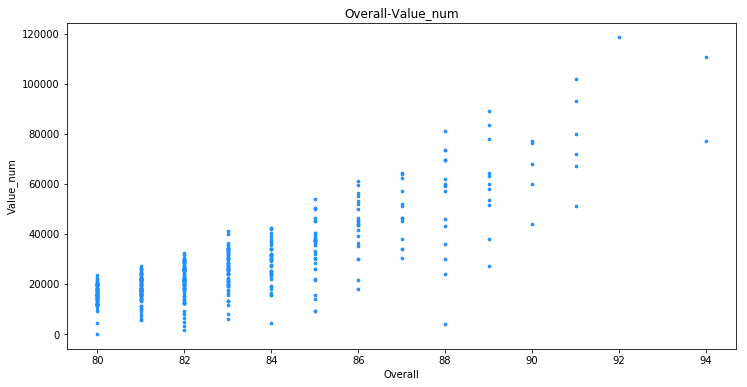

In [160]:
scatter_rel(df=df, feature_one='Overall', feature_two='Value_num')

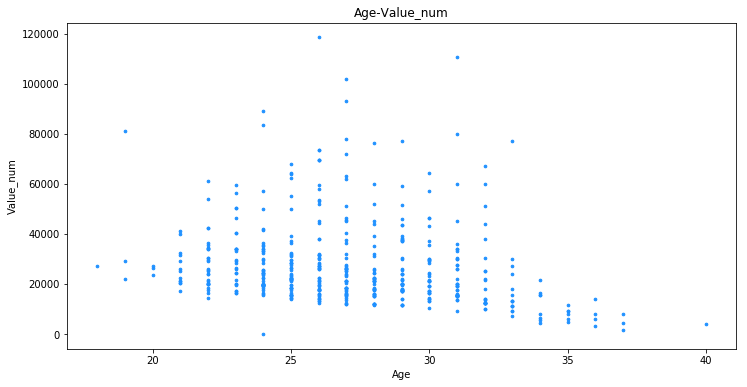

In [161]:
scatter_rel(df=df, feature_one='Age', feature_two='Value_num')

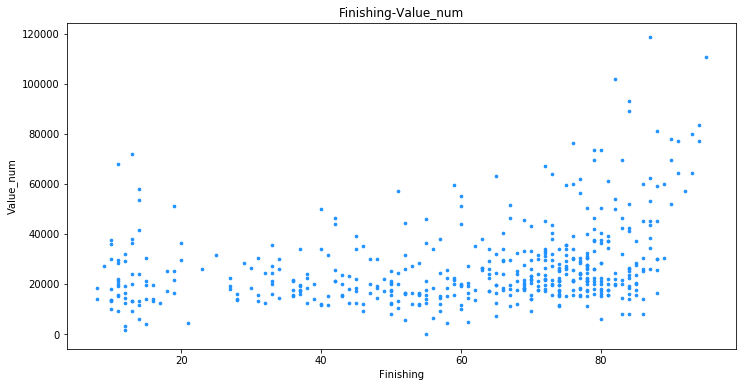

In [162]:
scatter_rel(df=df, feature_one='Finishing', feature_two='Value_num')

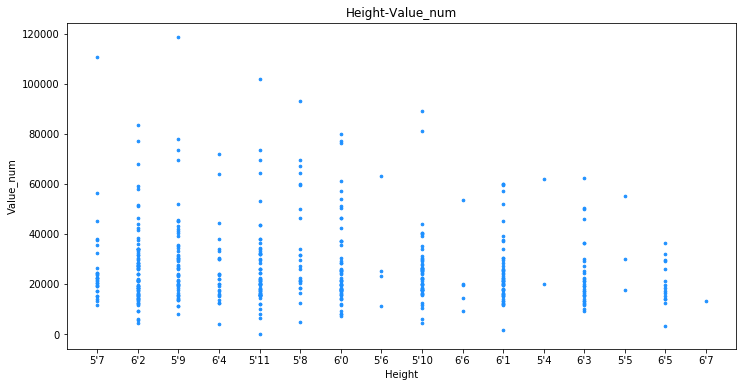

In [163]:
scatter_rel(df=df, feature_one='Height', feature_two='Value_num')

In [164]:
fwdf = df[df['Position'].isin(forwards)]
mfdf = df[df['Position'].isin(mfs)]
dfdf = df[df['Position'].isin(dfs)]
gkdf = df[df['Position'].isin(gk)]

fwdf.shape, mfdf.shape, dfdf.shape, gkdf.shape

((2667, 89), (7208, 89), (5866, 89), (2022, 89))

In [165]:
fwdf.Value_num.mean(), mfdf.Value_num.mean(), dfdf.Value_num.mean(), gkdf.Value_num.mean()

(2827.6584176977876,
 2805.3072974472807,
 1975.1380838731675,
 1588.0885262116717)

In [171]:
df.sort_values(by='Value_num', ascending=False)[:15]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Value_num
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,118500
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,110500
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,102000
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M,93000
15,211110,P. Dybala,24,https://cdn.sofifa.org/players/4/19/211110.png,Argentina,https://cdn.sofifa.org/flags/52.png,89,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,€153.5M,89000
16,202126,H. Kane,24,https://cdn.sofifa.org/players/4/19/202126.png,England,https://cdn.sofifa.org/flags/14.png,89,91,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,...,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,€160.7M,83500
25,231747,K. Mbappé,19,https://cdn.sofifa.org/players/4/19/231747.png,France,https://cdn.sofifa.org/flags/18.png,88,95,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,34.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0,€166.1M,81000
7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M,80000
17,194765,A. Griezmann,27,https://cdn.sofifa.org/players/4/19/194765.png,France,https://cdn.sofifa.org/flags/18.png,89,90,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,€165.8M,78000
10,188545,R. Lewandowski,29,https://cdn.sofifa.org/players/4/19/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,90,90,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,...,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,€127.1M,77000


### CORELATION STUDY

In [188]:
def corr(x, y):
    
    return np.corrcoef(x, y)[0][1]

In [189]:
corr(df['Overall'], df['Value_num'])

0.6271933118252484

In [183]:
corr(df['Potential'], df['Value_num'])

0.5764345368753229

In [184]:
corr(fwdf['Finishing'], fwdf['Value_num'])

0.57695651436506

In [190]:
corr(fwdf['ShotPower'], fwdf['Value_num'])

0.46539602984244555

In [191]:
corr(fwdf['Positioning'], fwdf['Value_num'])

0.5328090911778437

In [192]:
corr(fwdf['SprintSpeed'], fwdf['Value_num'])

0.19040696810130361

In [193]:
corr(mfdf['ShortPassing'], mfdf['Value_num'])

0.5629235865566797

In [194]:
corr(mfdf['Vision'], mfdf['Value_num'])

0.5315887646108262

In [195]:
Stats = ['Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle']

In [204]:
def corr_compare(df):
    vals = [corr(df[i], df['Value_num']) for i in Stats]
    plt.figure(figsize=(16,8))
    plt.title("What Decides Value? - {}".format(str(df)[:2].upper()))
    plt.bar(Stats, vals, color='khaki', edgecolor='k')
    plt.xticks(rotation='45')
    plt.xlabel('Stats')
    plt.ylabel("Correlation With Value")

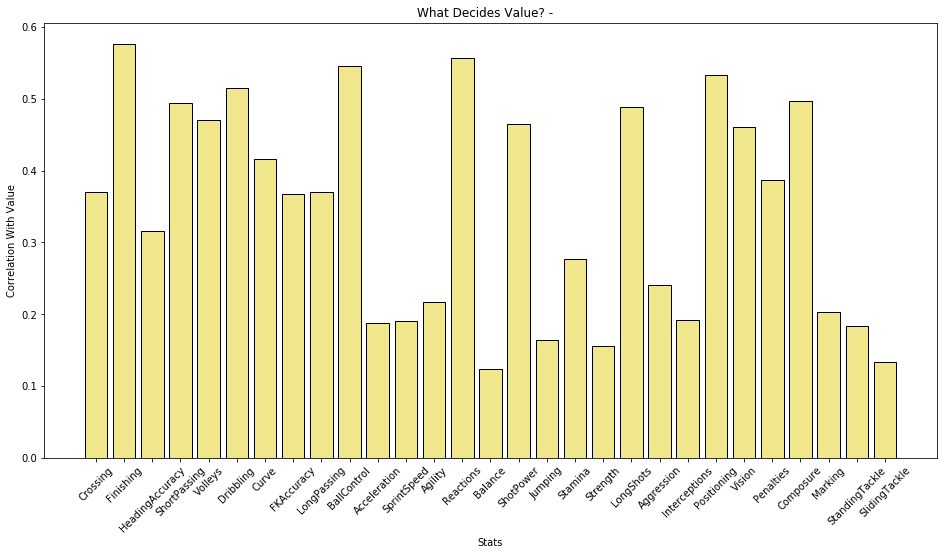

In [205]:
corr_compare(fwdf)

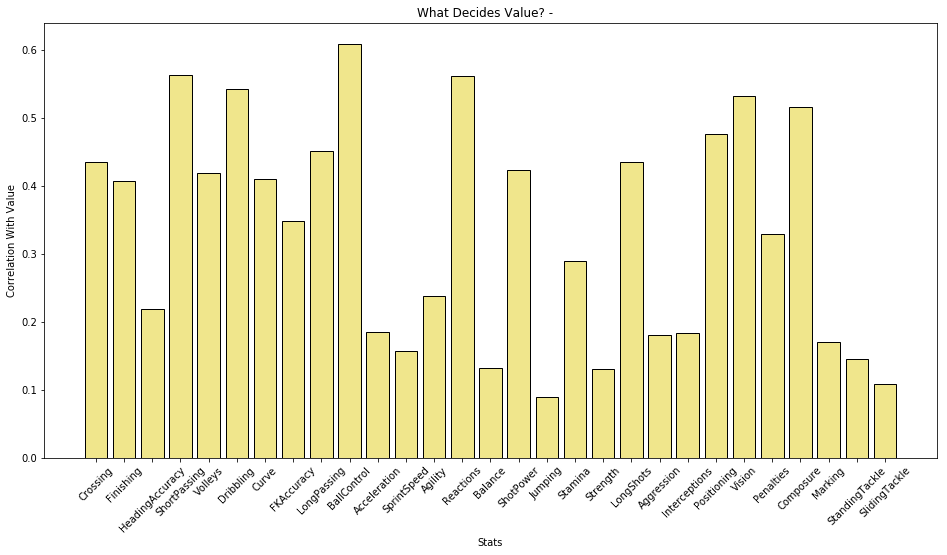

In [206]:
corr_compare(mfdf)

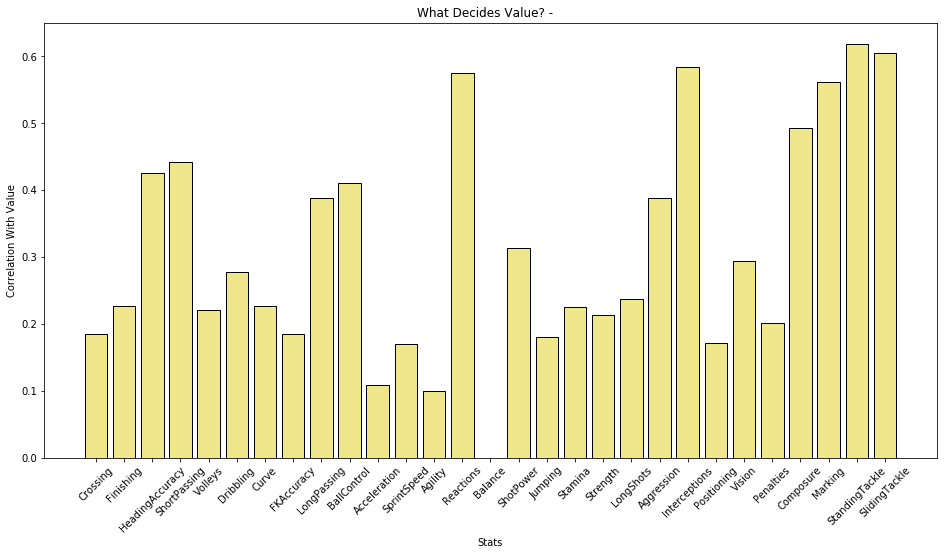

In [207]:
corr_compare(dfdf)